# support vector machine - SVM


#### importing required packages

In [189]:
import numpy as n
import pandas as p
import matplotlib.pyplot as plt

#### reading data from csv file

In [190]:
df=p.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


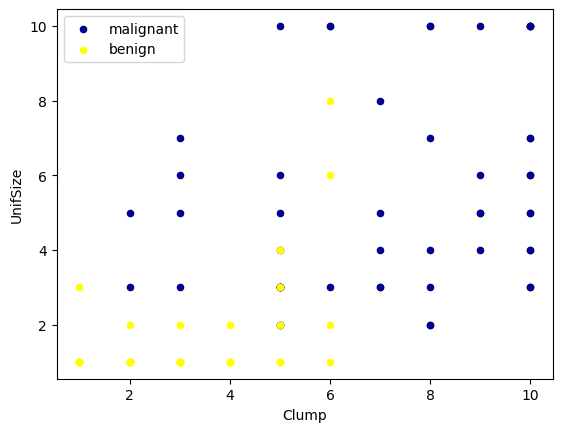

In [191]:
ax=df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant')
ax2=df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax)
plt.show()

#### data preprocessing

In [192]:
df.shape,df.dtypes

((699, 11),
 ID              int64
 Clump           int64
 UnifSize        int64
 UnifShape       int64
 MargAdh         int64
 SingEpiSize     int64
 BareNuc        object
 BlandChrom      int64
 NormNucl        int64
 Mit             int64
 Class           int64
 dtype: object)

In [193]:
df['BareNuc'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

'?' is not a integer
replcing with 1 

In [194]:
df[df['BareNuc']=='?']

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [195]:
df['BareNuc']=(df['BareNuc'].replace('?',1)).astype('int64')
df['BareNuc'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [196]:
df['BareNuc'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [197]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### selecting the feature set

In [198]:
x=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']].values
y=df[['Class']].values


#### splitting  the data into training and testing sets

In [199]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)
print("train set: " ,train_x.shape,train_y.shape)
print("test set : ",test_x.shape,test_y.shape)

train set:  (559, 9) (559, 1)
test set :  (140, 9) (140, 1)


In [200]:
type(x),type(y)
x[0:7]


array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1],
       [ 8, 10, 10,  8,  7, 10,  9,  7,  1],
       [ 1,  1,  1,  1,  2, 10,  3,  1,  1]], dtype=int64)

### support vector machine (svm) models

In [201]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(x,y)

c:\Users\hemas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [202]:
y_predict=clf.predict(test_x)

### evaluation

[[71  3]
 [ 2 64]]
jaccard_score :  0.9342105263157895
f1_score :  0.9642985013554295


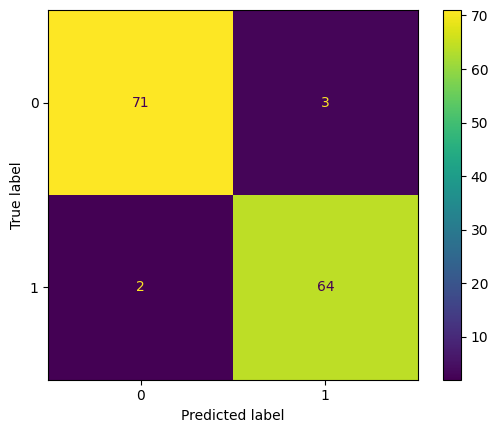

In [218]:
from sklearn.metrics import confusion_matrix,jaccard_score,f1_score,ConfusionMatrixDisplay
print(confusion_matrix(test_y,y_predict,labels = [2,4]))
print("jaccard_score : ",jaccard_score(test_y, y_predict,pos_label=2))
print("f1_score : ",f1_score(test_y, y_predict,average='weighted'))
cm=confusion_matrix(test_y, y_predict)
plc=ConfusionMatrixDisplay(confusion_matrix=cm)
plc.plot()

c:\Users\hemas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


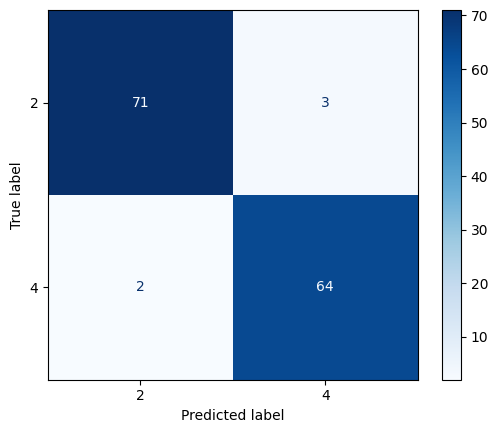

In [225]:
from sklearn.metrics import plot_confusion_matrix
cm=plot_confusion_matrix(clf,test_x,test_y,cmap='Blues')